# BADM 575 Homework 3
## Submitted by: Kanchan Singh

### Import Libraries

In [3]:
import pandas as pd 
import numpy as np
import statistics as st
import scipy.stats as stat
import math
import matplotlib as mlp 
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torchviz import make_dot
import sklearn 
import scipy.optimize as opt
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression

import warnings

warnings.filterwarnings("ignore")
# install packages with requirements.txt
# !pip install -r ../requirements.txt
# !pip3 freeze > requirements.txt

# Define a color palette for the pie charts
colors = ['#ff9999', '#66b3ff']  # You can customize the colors as needed
layout = dict(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)')

### Load data

In [61]:
df = pd.read_csv('Supplier_Disruption_Risk.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SupplierID               5000 non-null   int64  
 1   NumberOfCustomers        5000 non-null   int64  
 2   AverageShareofBusiness   5000 non-null   float64
 3   AverageSizeofSuppliers   5000 non-null   float64
 4   AverageSizeofCustomers   5000 non-null   float64
 5   CAGRBusiness             5000 non-null   float64
 6   TechnologyInvestment     5000 non-null   float64
 7   CountryGDP               5000 non-null   float64
 8   CountryGDPGrowth         5000 non-null   float64
 9   IndexOfPoliticalTurmoil  5000 non-null   float64
 10  IndexOfSocialTurmoil     5000 non-null   float64
 11  NumberofProducts         5000 non-null   int64  
 12  NumberofNewProducts      5000 non-null   int64  
 13  ProfitabilityLast5Years  5000 non-null   float64
 14  SupplyDisruption        

### Question 1. Graphical Exploration of the Data

#### Part 1. Box plots

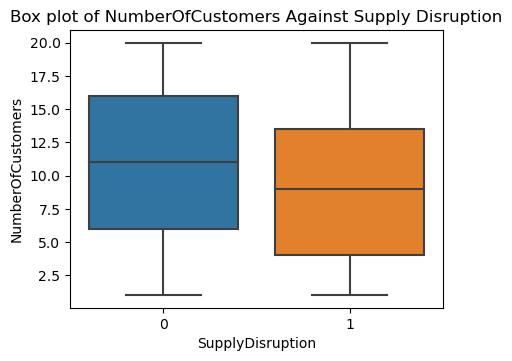

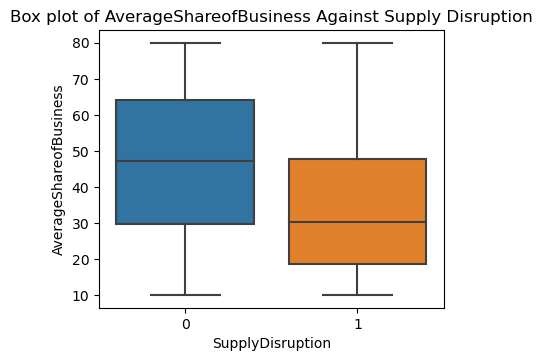

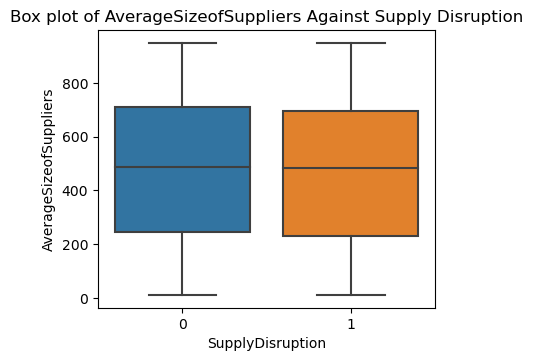

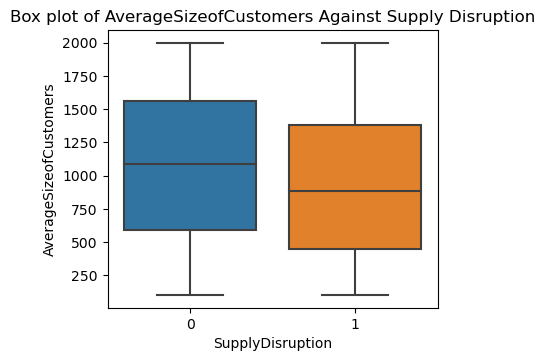

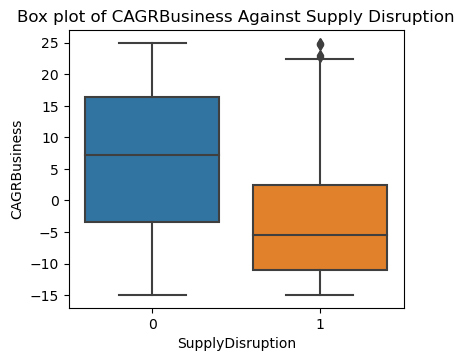

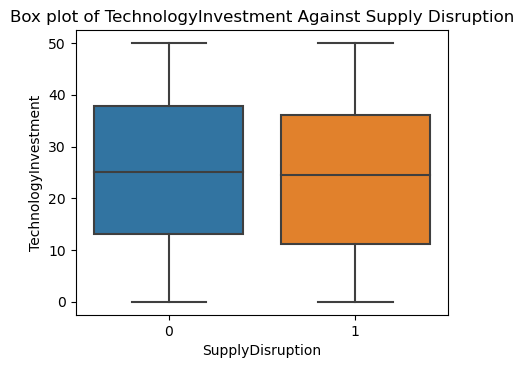

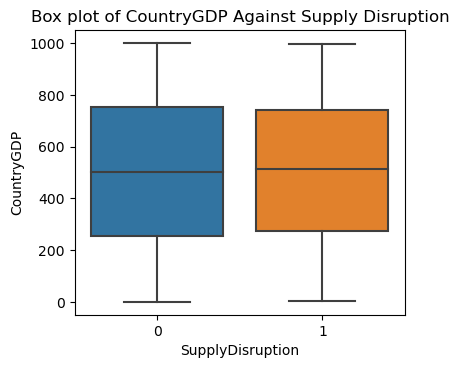

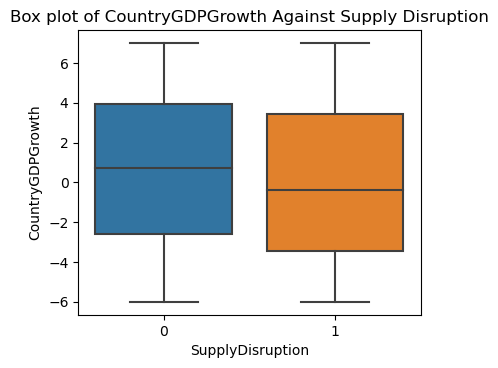

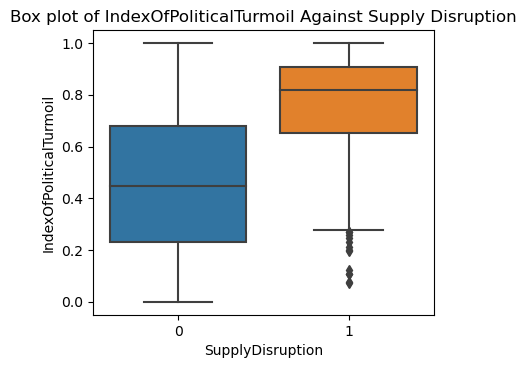

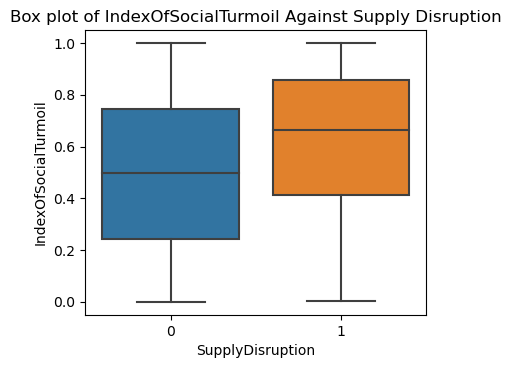

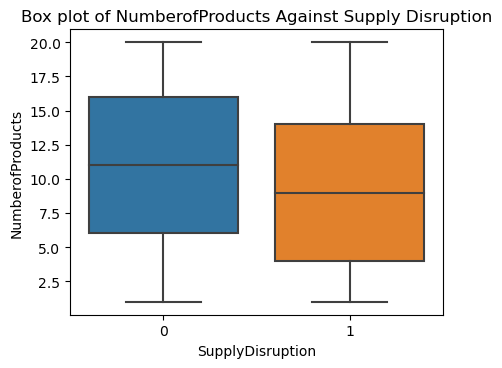

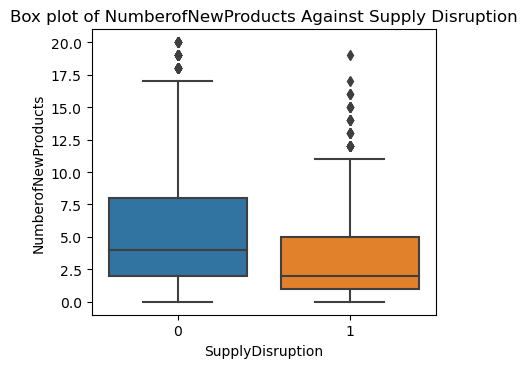

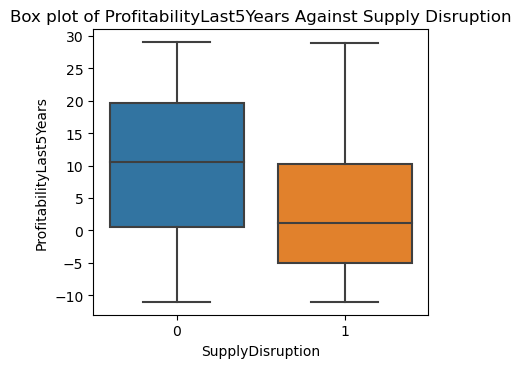

In [62]:
# Defining continuous variables
continuous_vars = df.columns[1:14].tolist()

# Creating a loop to plot each continuous variable

for i, var in enumerate(continuous_vars, start=1):
    plt.figure(figsize=(20,10))
    plt.subplot(3, 5, i)
    sns.boxplot(x='SupplyDisruption', y=var, data=df)
    plt.title(f'Box plot of {var} Against Supply Disruption')
    plt.tight_layout()
    plt.show()

#### Part 2.
We can see that for variables NumberOfCustomers, AverageShareofBusiness, AverageSizeofCustomers, CAGRBusiness, IndexOfPoliticalTurmoil, IndexOfSocialTurmoil, NumberofProducts and ProfitabilityLast5Years, the separation of classes is good because there is not much of an overlap between the plots. The rest of the variables are not very discriminative of the two classes.

#### Part 3.
Chosen variables: NumberOfCustomers, AverageShareofBusiness, AverageSizeofCustomers, CAGRBusiness, IndexOfPoliticalTurmoil, IndexOfSocialTurmoil, NumberofProducts, ProfitabilityLast5Years

### Question 2. Data Preparation

#### Part 1. Split test-train data

In [63]:
np.random.seed(1234)
X = df.drop(['SupplyDisruption','SupplierID'], axis=1)
y = df['SupplyDisruption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Part 2. Keeping selected variables

In [64]:
X_train = X_train.drop(['AverageSizeofSuppliers','TechnologyInvestment','CountryGDP','CountryGDPGrowth','NumberofNewProducts'], axis=1).reset_index(drop=True)
X_test = X_test.drop(['AverageSizeofSuppliers','TechnologyInvestment','CountryGDP','CountryGDPGrowth','NumberofNewProducts'], axis=1).reset_index(drop=True)

# Reset indices for y_train and y_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

### Question 3. Run classification models and predict

#### Part 1. Models

##### Logistic regression

In [65]:
m_logit = sm.Logit(y_train, sm.add_constant(X_train)).fit()

Optimization terminated successfully.
         Current function value: 0.159741
         Iterations 9


##### Random forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
m_rf = RandomForestClassifier(n_estimators=500)
m_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

##### SVM

In [67]:
from sklearn.svm import SVC
m_svm = SVC(kernel='sigmoid', probability=True)
m_svm.fit(X_train, y_train)

SVC(kernel='sigmoid', probability=True)

##### Neural network

In [68]:
# from sklearn.preprocessing import StandardScaler
# import torch.nn as nn
# import torch.optim as optim

# New X
X_nn = df.drop(['SupplyDisruption','SupplierID','AverageSizeofSuppliers','TechnologyInvestment','CountryGDP','CountryGDPGrowth','NumberofNewProducts'], axis=1)

# Normalize the input predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_nn)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)  # Reshape to column vector

# Split data into training and testing sets
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)
# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(8, 8)  # Input layer (8 input features, 8 hidden units)
        self.fc2 = nn.Linear(8, 8)  # Hidden layer (8 hidden units, 8 hidden units)
        self.fc3 = nn.Linear(8, 8)   # Hidden layer (8 hidden units, 8 hidden units)
        self.fc4 = nn.Linear(8, 1)  # Output layer (8 hidden units, 1 output)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

# Create the neural network model
model = NeuralNet()

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Train the model
num_epochs = 5000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_nn)
    loss = criterion(outputs, y_train_nn)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/5000], Loss: 0.3880
Epoch [200/5000], Loss: 0.3880
Epoch [300/5000], Loss: 0.3879
Epoch [400/5000], Loss: 0.3879
Epoch [500/5000], Loss: 0.3879
Epoch [600/5000], Loss: 0.3878
Epoch [700/5000], Loss: 0.3878
Epoch [800/5000], Loss: 0.3877
Epoch [900/5000], Loss: 0.3877
Epoch [1000/5000], Loss: 0.3876
Epoch [1100/5000], Loss: 0.3876
Epoch [1200/5000], Loss: 0.3875
Epoch [1300/5000], Loss: 0.3875
Epoch [1400/5000], Loss: 0.3874
Epoch [1500/5000], Loss: 0.3873
Epoch [1600/5000], Loss: 0.3873
Epoch [1700/5000], Loss: 0.3872
Epoch [1800/5000], Loss: 0.3871
Epoch [1900/5000], Loss: 0.3870
Epoch [2000/5000], Loss: 0.3869
Epoch [2100/5000], Loss: 0.3868
Epoch [2200/5000], Loss: 0.3866
Epoch [2300/5000], Loss: 0.3865
Epoch [2400/5000], Loss: 0.3863
Epoch [2500/5000], Loss: 0.3862
Epoch [2600/5000], Loss: 0.3860
Epoch [2700/5000], Loss: 0.3857
Epoch [2800/5000], Loss: 0.3855
Epoch [2900/5000], Loss: 0.3852
Epoch [3000/5000], Loss: 0.3849
Epoch [3100/5000], Loss: 0.3845
Epoch [3200/5000]

#### Part 2. Predictions

In [70]:
# Logistic regression
p_logit = m_logit.predict(sm.add_constant(X_test))

# Random forest
p_rf = m_rf.predict_proba(X_test)[:,1]

# SVM
p_svm = m_svm.predict_proba(X_test)[:, 1]

# Neural Network
with torch.no_grad():
    model.eval()
    predicted = model(X_test_nn)
    predicted = (predicted > 0.5).float()  # Convert probabilities to binary predictions
    accuracy = (predicted == y_test_nn).float().mean()
    print(f'Accuracy: {accuracy.item()*100:.2f}%')

Accuracy: 87.30%


#### Part 3. Box plots

##### Logistic regression

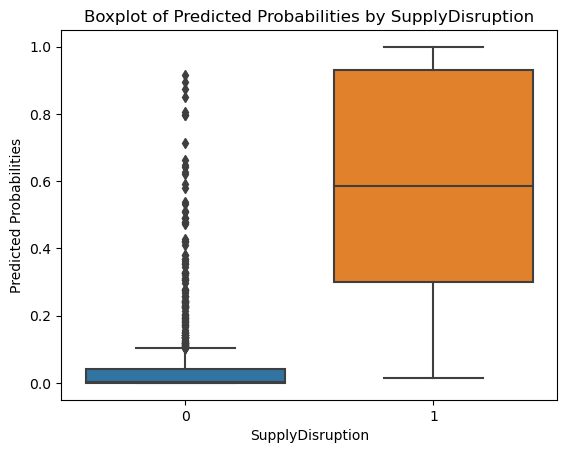

In [71]:
data = {'p': p_logit, 'SupplyDisruption': y_test}
df_logit = pd.DataFrame(data)
sns.boxplot(x='SupplyDisruption', y='p', data=df_logit)
plt.xlabel('SupplyDisruption')
plt.ylabel('Predicted Probabilities')
plt.title('Boxplot of Predicted Probabilities by SupplyDisruption')
plt.show()

For the logistic model, the separation between the predicted class is very good.

##### Random forest

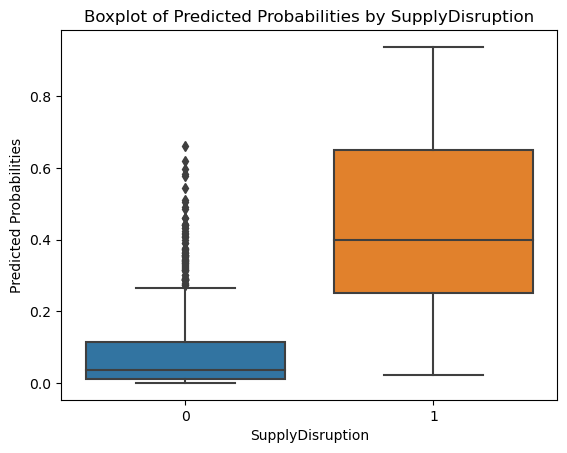

In [72]:
data = {'p': p_rf, 'SupplyDisruption': y_test}
df_rf = pd.DataFrame(data)
sns.boxplot(x='SupplyDisruption', y='p', data=df_rf)
plt.xlabel('SupplyDisruption')
plt.ylabel('Predicted Probabilities')
plt.title('Boxplot of Predicted Probabilities by SupplyDisruption')
plt.show()

For the random forest model, the separation between the predicted class is also very good.

##### SVM

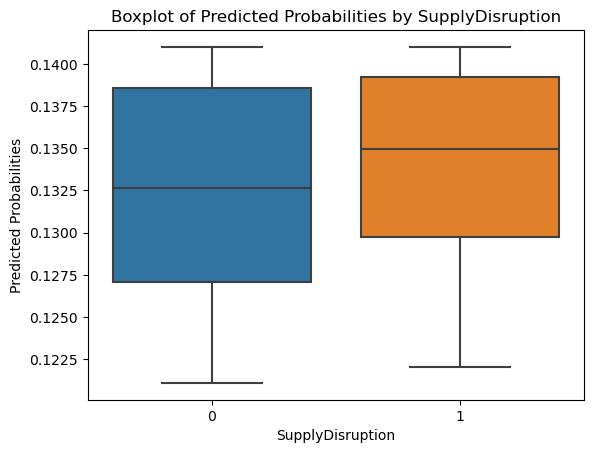

In [73]:
data = {'p': p_svm, 'SupplyDisruption': y_test}
df_svm = pd.DataFrame(data)
sns.boxplot(x='SupplyDisruption', y='p', data=df_svm)
plt.xlabel('SupplyDisruption')
plt.ylabel('Predicted Probabilities')
plt.title('Boxplot of Predicted Probabilities by SupplyDisruption')
plt.show()

The SVM model does not do a good job in discriminating between the two classes.

##### Neural network

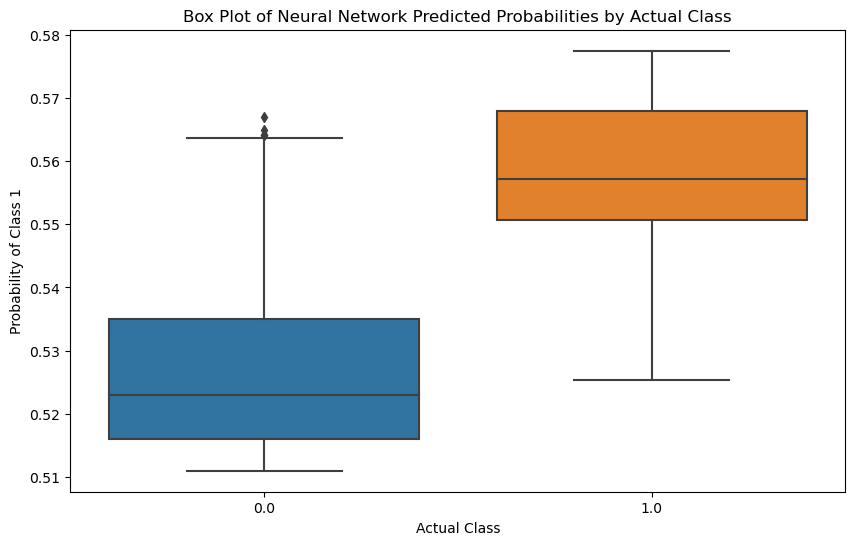

In [74]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    probabilities = torch.sigmoid(model(X_test_nn))  # Apply sigmoid to get probabilities from the output layer

# Create a DataFrame for plotting
probabilities_df = pd.DataFrame({
    'Actual Class': y_test_nn.numpy().flatten(),  # Convert y_test_nn to a numpy array and flatten it
    'Predicted Probability': probabilities.numpy().flatten()  # Convert probabilities to a numpy array and flatten it
})

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Actual Class', y='Predicted Probability', data=probabilities_df)
plt.title('Box Plot of Neural Network Predicted Probabilities by Actual Class')
plt.ylabel('Probability of Class 1')
plt.xlabel('Actual Class')
plt.show()

For the neural network model, the separation between the predicted class is also very good.

### Question 4. Performance comparison on the test sample

#### Part 1. Confusion matrix

In [75]:
# Logistic regression
t_logit = np.median(p_logit)
cl_logit = (p_logit >= t_logit).astype(int)
xt_logit = pd.crosstab(index = cl_logit,  columns=y_test)
print("Confusion matrix for Logistic Regression model:\n", xt_logit)

# Random forest
t_rf = np.median(p_rf)
cl_rf = (p_rf >= t_rf).astype(int)
xt_rf = pd.crosstab(index = cl_rf,  columns=y_test)
print("\n Confusion matrix for Random Forest model:\n", xt_rf)

# SVM
t_svm = np.median(p_svm)
cl_svm = (p_svm >= t_svm).astype(int)
xt_svm = pd.crosstab(index = cl_svm,  columns=y_test)
print("\n Confusion matrix for SVM model:\n", xt_svm)

# Neural network
# Evaluate the model
with torch.no_grad():
    model.eval()
    predicted = model(X_test_nn)
predicted = predicted.squeeze().numpy()
y_test_nn = y_test_nn.squeeze().numpy()
t_nn = np.median(predicted)
cl_nn = (predicted >= t_nn).astype(int)
xt_nn = pd.crosstab(index=cl_nn, columns=y_test_nn)
print("Confusion matrix for Neural Network model:\n", xt_nn)

Confusion matrix for Logistic Regression model:
 SupplyDisruption    0    1
row_0                     
0                 500    0
1                 373  127

 Confusion matrix for Random Forest model:
 SupplyDisruption    0    1
row_0                     
0                 494    1
1                 379  126

 Confusion matrix for SVM model:
 SupplyDisruption    0   1
row_0                    
0                 446  54
1                 427  73
Confusion matrix for Neural Network model:
 col_0  0.0  1.0
row_0          
0      499    1
1      374  126


#### Part 2. Sensitivity, Specificity, and Accuracy

In [76]:
# Logistic regression
Sens_logit = xt_logit.iloc[1,1]/(xt_logit.iloc[0,1]+xt_logit.iloc[1,1])
Spec_logit = xt_logit.iloc[0,0]/(xt_logit.iloc[0,0]+xt_logit.iloc[1,0])
Acc_logit = (xt_logit.iloc[0,0]+xt_logit.iloc[1,1])/(xt_logit.iloc[0,1]+xt_logit.iloc[1,1]+xt_logit.iloc[0,0]+xt_logit.iloc[1,0])
print(f'Decision threshold for Logistic Regression model: {np.round(t_logit,4)}, Sensitity: {np.round(Sens_logit,4)}, Specificity: {np.round(Spec_logit,4)}, Accuracy: {np.round(Acc_logit,4)}')

# Random forest
Sens_rf = xt_rf.iloc[1,1]/(xt_rf.iloc[0,1]+xt_rf.iloc[1,1])
Spec_rf = xt_rf.iloc[0,0]/(xt_rf.iloc[0,0]+xt_rf.iloc[1,0])
Acc_rf = (xt_rf.iloc[0,0]+xt_rf.iloc[1,1])/(xt_rf.iloc[0,1]+xt_rf.iloc[1,1]+xt_rf.iloc[0,0]+xt_rf.iloc[1,0])
print(f'Decision threshold for Random Forest model: {t_rf}, Sensitity: {np.round(Sens_rf,4)}, Specificity: {np.round(Spec_rf,4)}, Accuracy: {np.round(Acc_logit,4)}')

# SVM
Sens_svm = xt_svm.iloc[1,1]/(xt_svm.iloc[0,1]+xt_svm.iloc[1,1])
Spec_svm = xt_svm.iloc[0,0]/(xt_svm.iloc[0,0]+xt_svm.iloc[1,0])
Acc_svm = (xt_svm.iloc[0,0]+xt_svm.iloc[1,1])/(xt_svm.iloc[0,1]+xt_svm.iloc[1,1]+xt_svm.iloc[0,0]+xt_svm.iloc[1,0])
print(f'Decision threshold for SVM model: {t_svm}, Sensitity: {np.round(Sens_svm,4)}, Specificity: {np.round(Spec_svm,4)}, Accuracy: {np.round(Acc_svm,4)}')

# Neural network
# Evaluate the model
with torch.no_grad():
    model.eval()
    predicted = model(X_test_nn)
Sens_nn = xt_nn.iloc[1,1]/(xt_nn.iloc[0,1]+xt_nn.iloc[1,1])
Spec_nn = xt_nn.iloc[0,0]/(xt_nn.iloc[0,0]+xt_nn.iloc[1,0])
Acc_nn = (xt_nn.iloc[0,0]+xt_nn.iloc[1,1])/(xt_nn.iloc[0,1]+xt_nn.iloc[1,1]+xt_nn.iloc[0,0]+xt_nn.iloc[1,0])
print(f'Decision threshold for Neural Network model: {t_nn}, Sensitity: {np.round(Sens_nn,4)}, Specificity: {np.round(Spec_nn,4)}, Accuracy: {np.round(Acc_nn,4)}')

Decision threshold for Logistic Regression model: 0.0074, Sensitity: 1.0, Specificity: 0.5727, Accuracy: 0.627
Decision threshold for Random Forest model: 0.05, Sensitity: 0.9921, Specificity: 0.5659, Accuracy: 0.627
Decision threshold for SVM model: 0.1328584342340369, Sensitity: 0.5748, Specificity: 0.5109, Accuracy: 0.519
Decision threshold for Neural Network model: 0.10258086025714874, Sensitity: 0.9921, Specificity: 0.5716, Accuracy: 0.625


#### Part 3. ROC Curve

##### Logistic regression

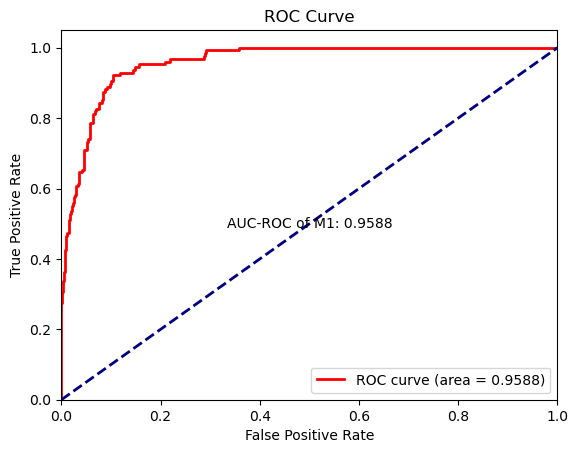

In [59]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, p_logit)
roc_auc_logit = roc_auc_score(y_test, p_logit)
plt.figure()
plt.plot(fpr_logit, tpr_logit, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_logit)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, f"AUC-ROC of M1: {round(roc_auc_logit, 4)}", horizontalalignment='center', verticalalignment='center', fontsize=10)
plt.show()

##### Random forest

Text(0.5, 0.5, 'AUC-ROC of M1: 0.9431')

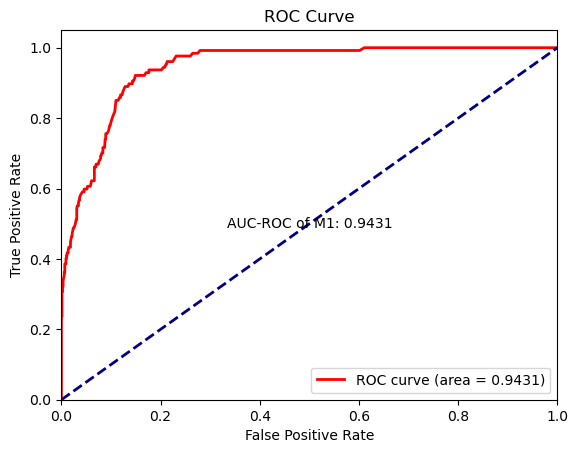

In [50]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, p_rf)
roc_auc_rf = roc_auc_score(y_test, p_rf)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, f"AUC-ROC of M1: {round(roc_auc_rf, 4)}", horizontalalignment='center', verticalalignment='center', fontsize=10)

##### SVM

Text(0.5, 0.5, 'AUC-ROC of M1: 0.5667')

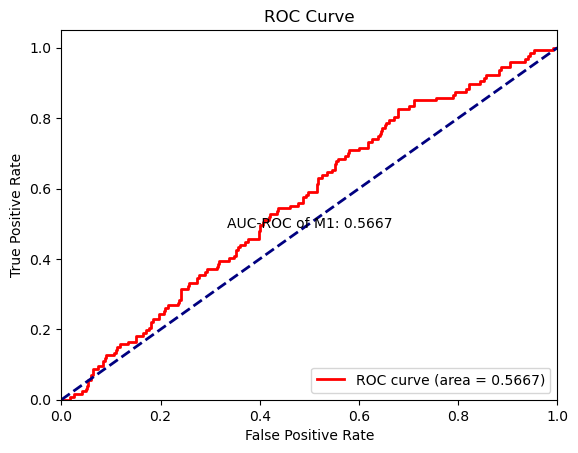

In [51]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, p_svm)
roc_auc_svm = roc_auc_score(y_test, p_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, f"AUC-ROC of M1: {round(roc_auc_svm, 4)}", horizontalalignment='center', verticalalignment='center', fontsize=10)

##### Nerual Network

Text(0.5, 0.5, 'AUC-ROC of M1: 0.955')

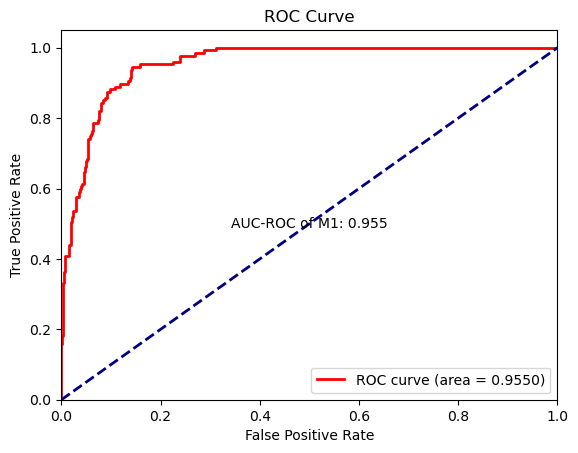

In [52]:
# Evaluate the model
with torch.no_grad():
    model.eval()
    predicted = model(X_test_nn)

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test_nn, predicted)
roc_auc_nn = roc_auc_score(y_test_nn, predicted)
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_nn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, f"AUC-ROC of M1: {round(roc_auc_nn, 4)}", horizontalalignment='center', verticalalignment='center', fontsize=10)

The area under curve of the ROC curve for each model is as follows:

- Logistic regression: 0.9588
- Random forest: 0.9431
- SVM: 0.5667
- Neural Network: 0.955

AUC-ROC signifies the percentage likelihood that a prediction by the model is the correct prediction. We can see that this value is very high for the logistic, random forest and neural network model, which means that they perform well on test data. However, the AUC-ROC for SVM model is close to 57%, which is not a good indicator for its performance.

### Question 5. Optimal Decision Threshold

##### Logistic regression

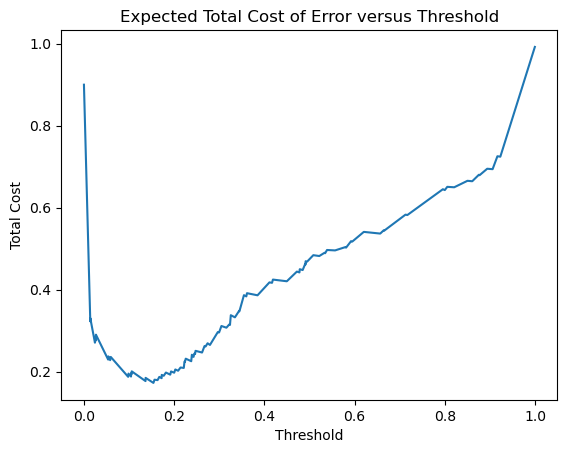

Optimal decision threshold for Logistic Regression model: 0.15404819420151586


In [53]:
def Cost(sens, spec, cfn, cfp):
    return cfn * (1 - sens) + cfp * (1 - spec)

cfn = 1
cfp = 0.9

Costs = []
for i in range(len(thresholds_logit)):
    Costs.append(Cost(tpr_logit[i], 1 - fpr_logit[i], cfn, cfp))

plt.plot(thresholds_logit[1:], Costs[1:])
plt.xlabel("Threshold")
plt.ylabel("Total Cost")
plt.title("Expected Total Cost of Error versus Threshold")
plt.show()

index = np.argmin(Costs)
optimal_threshold_logit = thresholds_logit[index]
print(f'Optimal decision threshold for Logistic Regression model: {optimal_threshold_logit}')

##### Random forest

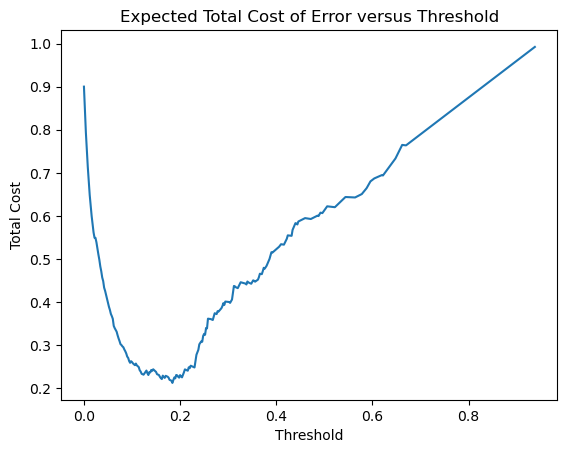

Optimal decision threshold for Random Forest model: 0.184


In [54]:
def Cost(sens, spec, cfn, cfp):
    return cfn * (1 - sens) + cfp * (1 - spec)

cfn = 1
cfp = 0.9

Costs = []
for i in range(len(thresholds_rf)):
    Costs.append(Cost(tpr_rf[i], 1 - fpr_rf[i], cfn, cfp))

plt.plot(thresholds_rf[1:], Costs[1:])
plt.xlabel("Threshold")
plt.ylabel("Total Cost")
plt.title("Expected Total Cost of Error versus Threshold")
plt.show()

index = np.argmin(Costs)
optimal_threshold_rf = thresholds_rf[index]
print(f'Optimal decision threshold for Random Forest model: {optimal_threshold_rf}')

For false positive cost of 0.9 and false negative cost of 1, following are the optimal thresholds for each model:

- Logistic regression: 0.154 or 15.4%.
- Random forest: 0.184 or 18.4%.

The above thresholds minimise the cost functions for the specified business context. In different business contexts, these costs of false positive/negative errors are different and accordingly the optimal decision threshold would vary. Additionally, alignment of model performance with business objectives is important; a model with higher overall accuracy might not be the best choice if it incurs a higher cost of errors when actual business stakes are considered.